In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pex

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stockdata/stockdata.csv


In [3]:
df = pd.read_csv("/kaggle/input/stockdata/stockdata.csv")



In [4]:
df.drop(['BA', 'T','MGM'], axis=1)

,Date,AAPL,AMZN,IBM,TSLA,GOOG,S&P500
0,2012-01-12,60.198570,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [5]:
df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,S&P500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [6]:
df.describe()


,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,S&P500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


In [7]:
df["TSLA"].describe()

count    2159.000000
mean      259.600815
std       210.988003
min        22.790001
25%       184.595001
50%       231.960007
75%       307.350006
max      1643.000000
Name: TSLA, dtype: float64

In [12]:
graph_stocks = pex.line(title = "Technology Stock Prices")
for i in df.columns[1:]:
    graph_stocks.add_scatter(x = df.Date, y = df[i], name = i)
graph_stocks.show()

In [9]:
### start of random forrest

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df.dtypes

Date       object
AAPL      float64
BA        float64
T         float64
MGM       float64
AMZN      float64
IBM       float64
TSLA      float64
GOOG      float64
S&P500    float64
dtype: object

In [15]:
df = df.select_dtypes(exclude=['object'])
df=df.fillna(df.mean())
X = df.drop('TSLA',axis=1)
y = df['TSLA']


In [16]:
y.describe()

count    2159.000000
mean      259.600815
std       210.988003
min        22.790001
25%       184.595001
50%       231.960007
75%       307.350006
max      1643.000000
Name: TSLA, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor.fit(trainX, trainY)

RandomForestRegressor(random_state=42)

In [34]:
predicted_values = regressor.predict(testX)

In [35]:
df=pd.DataFrame({'Actual':testY, 'Predicted':predicted_values})
df

,Actual,Predicted
175,30.020000,30.495100
264,38.299999,36.962701
892,266.149994,259.928799
379,119.029999,123.090000
317,47.830002,46.453499
...,...,...
2092,780.039978,795.419299
1494,331.100006,334.815201
40,36.009998,33.116100
1865,213.910004,220.075701


In [22]:
df.describe()

,Actual,Predicted
count,1511.000000,1511.000000
mean,259.869987,259.782431
std,209.810778,208.827484
min,26.100000,26.773900
25%,186.190002,187.150699
50%,231.100006,232.021496
75%,307.020004,307.034052
max,1643.000000,1604.012296


In [27]:
print(len(predicted_values))

1511


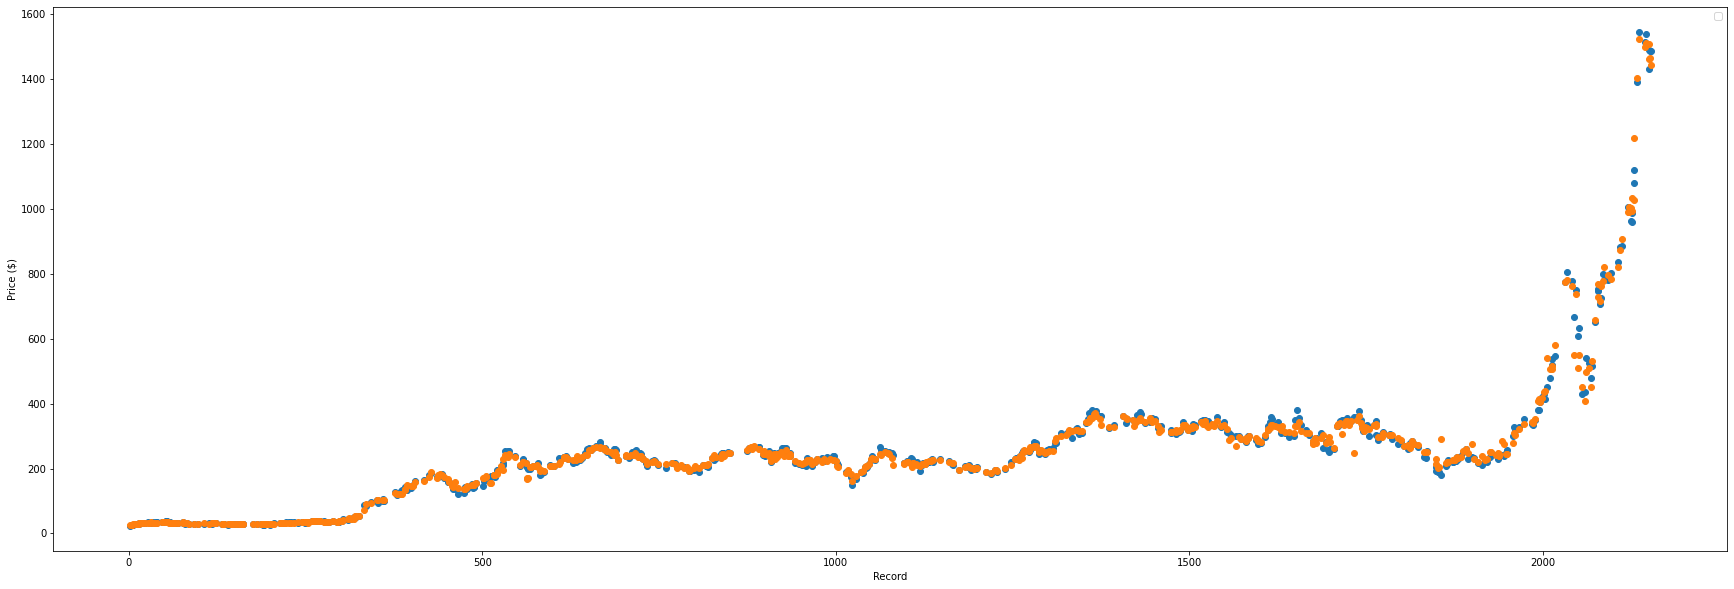

In [36]:
plt.figure(figsize=(30, 10))
df.sort_index()
plt.scatter(df.index, testY)
plt.scatter(df.index, predicted_values)
plt.legend()
plt.xlabel("Record")
plt.ylabel("Price ($)")
plt.show()

In [43]:
### Here is the random tree model

In [39]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(testY, predicted_values))
print('Mean Squared Error:', metrics.mean_squared_error(testY, predicted_values))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testY, predicted_values)))
r2 = metrics.r2_score(testY,predicted_values)
print("R-Squared:", r2)

Mean Absolute Error: 8.57745116729939
Mean Squared Error: 245.46427461348557
Root Mean Squared Error: 15.66729953161953
R-Squared: 0.9946252292896763


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



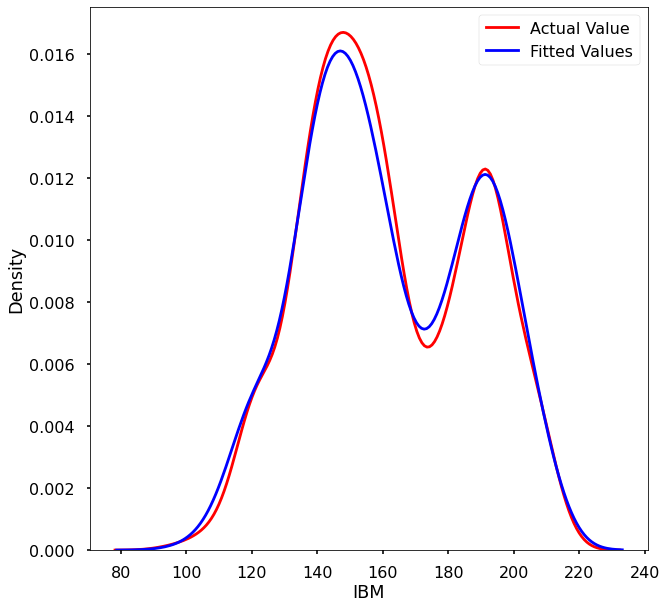

In [66]:
plt.figure(figsize=(10, 10))
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
ax.legend()




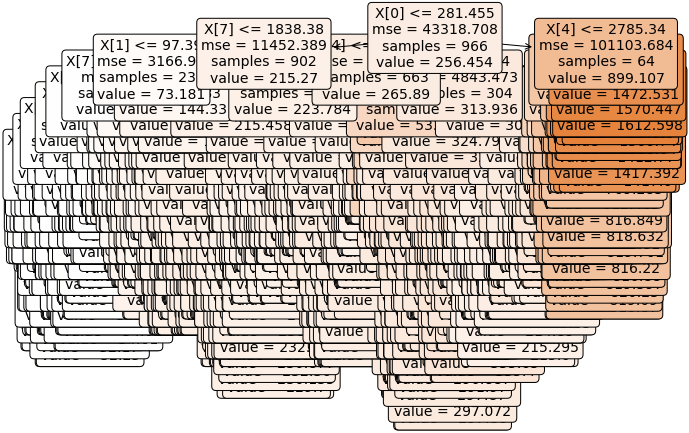

In [42]:
import pydot
Tree = regressor.estimators_[5]
from sklearn import tree
plt.figure(figsize=(10,7))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

In [68]:
df = pd.read_csv("/kaggle/input/stockdata/stockdata.csv")

In [69]:
df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,S&P500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [70]:
normalizedData = df.copy()
for i in normalizedData.columns[1:]:
    normalizedData[i] = normalizedData[i] / normalizedData[i][0]

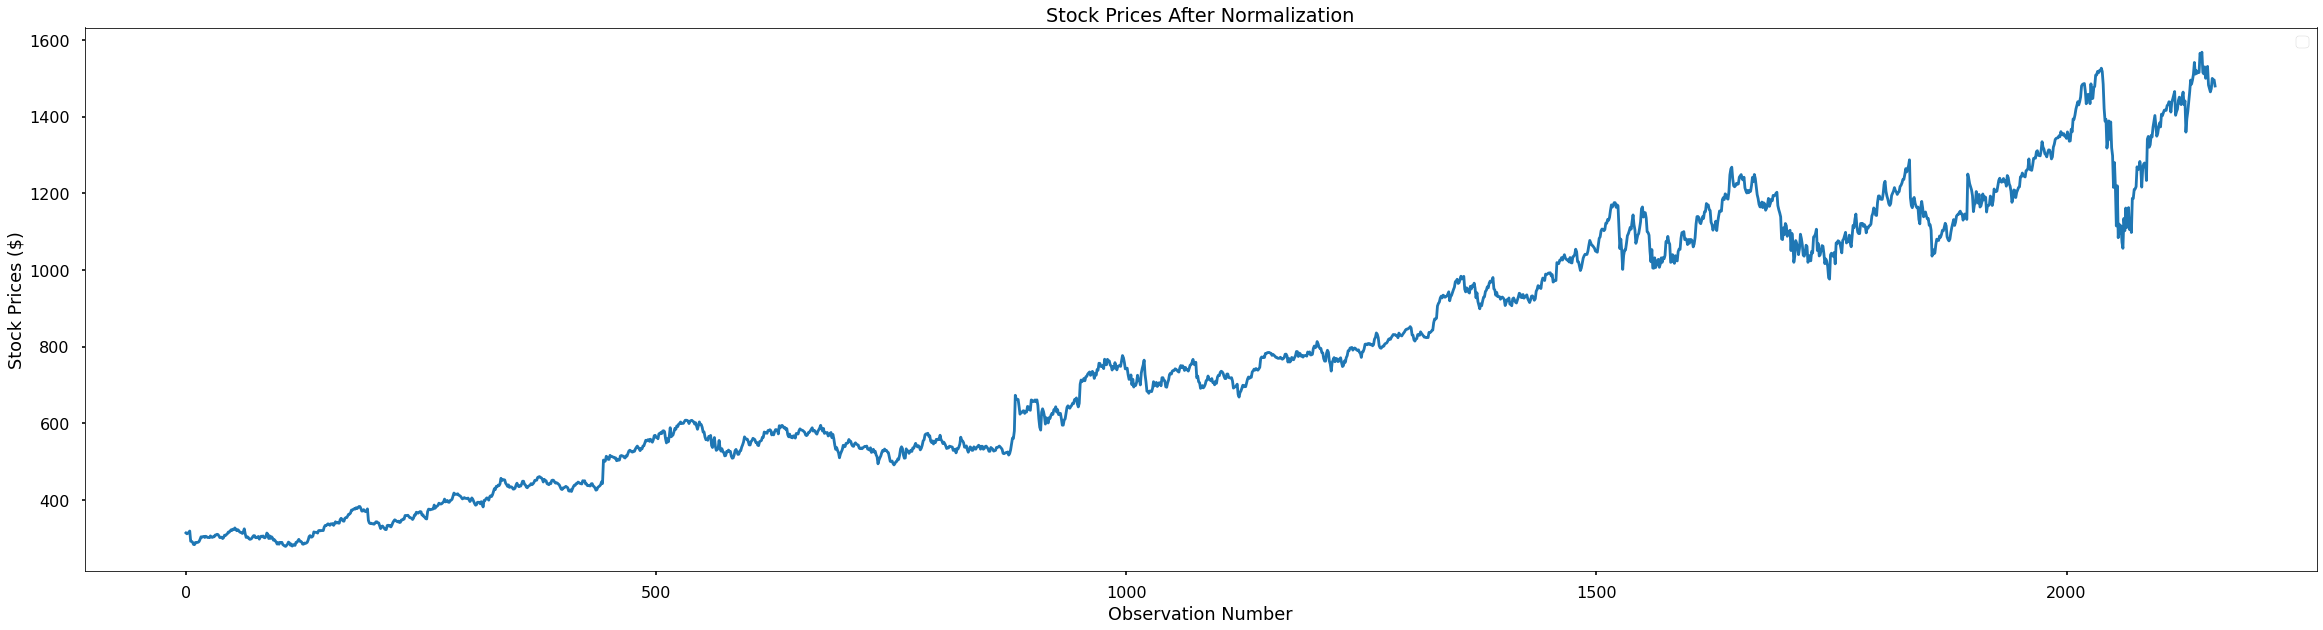

In [71]:
# Plotting the Normalized Stocks of each of the company
plt.style.use("seaborn-poster")
plt.figure(figsize = (40,10))
plt.plot(df['GOOG'].values)
df['IBM'].values
plt.xlabel("Individual Record Number")
plt.ylabel("Stock Prices ($)")
plt.legend()
plt.title("Stock Prices After Normalization")
plt.show()

In [73]:
normalizedData.IBM

0       1.000000
1       0.992301
2       0.996954
3       1.002880
4       0.999834
          ...   
2154    0.694821
2155    0.698532
2156    0.692107
2157    0.704016
2158    0.702022
Name: IBM, Length: 2159, dtype: float64

In [74]:
df.head()


,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,S&P500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [129]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import plotly.graph_objects as go
from keras.preprocessing.sequence import TimeseriesGenerator

In [130]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_axis(df['Date'], inplace=True)


In [131]:
googData = df['IBM'].values
googData = googData.reshape((-1,1))

split_percent = 0.9
split = int(split_percent*len(googData))

goog_train = googData[:split]
goog_test = googData[split:]

date_train = df['Date'][:split]
date_test = df['Date'][split:]

print(len(goog_train))
print(len(goog_test))

1943
216


In [132]:
lb = 15

calc_train = TimeseriesGenerator(goog_train, goog_train, length=lb, batch_size=20)     
calc_test = TimeseriesGenerator(goog_test, goog_test, length=lb, batch_size=1)


In [133]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(10, activation='relu',input_shape=(lb,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

num_epochs = 15
model.fit_generator(calc_train, epochs=num_epochs, verbose=1)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/15
97/97 [==============================] - 2s 4ms/step - loss: 31329.3242
Epoch 2/15
97/97 [==============================] - 0s 4ms/step - loss: 29439.0938
Epoch 3/15
97/97 [==============================] - 0s 4ms/step - loss: 28483.7031
Epoch 4/15
97/97 [==============================] - 0s 4ms/step - loss: 27967.9141
Epoch 5/15
97/97 [==============================] - 0s 4ms/step - loss: 27584.0332
Epoch 6/15
97/97 [==============================] - 0s 4ms/step - loss: 26962.8965
Epoch 7/15
97/97 [==============================] - 0s 4ms/step - loss: 25219.6484
Epoch 8/15
97/97 [==============================] - 0s 4ms/step - loss: 3976.9497
Epoch 9/15
97/97 [==============================] - 0s 4ms/step - loss: 15.8396
Epoch 10/15
97/97 [==============================] - 0s 4ms/step - loss: 15.8216
Epoch 11/15
97/97 [==============================] - 0s 4ms/step - loss: 15.8447
Epoch 12/15
97/97 [==============================] - 0s 4ms/step - loss: 15.8539
Epoch 13/15
97

In [134]:
prediction = model.predict(calc_test)

goog_train = goog_train.reshape((-1))
goog_test = goog_test.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_train,
    y = goog_train,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = goog_test,
    mode='lines',
    name = 'Actual'
)
layout = go.Layout(
    title = "IBM Stock",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Price ($)"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

In [135]:
goog_train = googData[1943:]
goog_test = googData[1958:]

print(len(goog_test))
print(len(prediction))

201
201


In [136]:
print(goog_test)

[[134.070007]
 [135.440002]
 [135.970001]
 [133.820007]
 [135.25    ]
 [133.729996]
 [135.529999]
 [137.669998]
 [137.889999]
 [138.779999]
 [137.690002]
 [137.610001]
 [135.470001]
 [135.589996]
 [134.479996]
 [134.      ]
 [134.399994]
 [134.309998]
 [134.520004]
 [133.199997]
 [133.839996]
 [134.339996]
 [135.970001]
 [135.089996]
 [133.770004]
 [134.449997]
 [132.910004]
 [132.119995]
 [131.990005]
 [131.910004]
 [133.220001]
 [133.919998]
 [133.910004]
 [133.759995]
 [135.320007]
 [134.210007]
 [134.130005]
 [134.220001]
 [134.410004]
 [134.559998]
 [135.589996]
 [135.550003]
 [134.979996]
 [134.910004]
 [135.270004]
 [132.809998]
 [134.039993]
 [135.419998]
 [134.339996]
 [134.100006]
 [134.190002]
 [135.309998]
 [136.740005]
 [136.690002]
 [136.600006]
 [135.820007]
 [136.619995]
 [137.979996]
 [138.309998]
 [139.169998]
 [143.889999]
 [142.869995]
 [140.559998]
 [138.619995]
 [139.550003]
 [137.690002]
 [136.770004]
 [143.729996]
 [146.270004]
 [149.110001]
 [156.330002]
 [156.

In [95]:
print(prediction)

[132.99489  133.09593  133.96184  134.9325   133.90869  133.82713
 133.49742  133.99384  135.83794  136.57648  136.87108  136.74
 136.47115  135.52916  134.81767  134.19963  133.48868  133.44456
 133.52533  133.62617  132.97717  132.7679   133.27826  134.41364
 134.6132   133.61864  133.38814  132.7397   131.67043  131.17862
 131.02614  131.71323  132.60632  132.93169  132.89354  133.64005
 133.68599  133.30455  133.2289   133.31728  133.44609  133.95335
 134.30746  134.13788  133.96858  134.14163  133.0573   132.73886
 133.81715  133.85648  133.38777  133.29822  133.8911   135.0097
 135.57477  135.62668  135.22989  135.31238  136.16222  136.75578
 137.30025  139.51466  140.49266  139.75844  138.47345  138.24832
 137.70729  136.63577  139.51892  142.46541  144.4679   147.46147
 149.14206  149.20409  149.64722  149.93245  150.27354  150.41187
 149.7415   149.54987  149.82188  150.50745  150.5181   148.24826
 142.78094  137.49399  129.86526  122.62006  127.75601  125.53755
 127.831314 12

In [96]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(goog_test, prediction)
rmse = math.sqrt(mse)
print(rmse)

4.071363984407218


In [97]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(goog_test, prediction)

2.9216346557301387

In [98]:

mae = metrics.mean_absolute_error(goog_test, prediction)
mse = metrics.mean_squared_error(goog_test, prediction)
rmse = np.sqrt(mse) # or mse**(0.5)  


print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)



Results of sklearn.metrics:
MAE: 2.9216346557301387
MSE: 16.576004693528215
RMSE: 4.071363984407218
R-Squared: 0.8779173136403422
